In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from langdetect import detect_langs , detect
from textblob import TextBlob
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import spacy
import nltk
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
df = pd.read_csv('master_dataset.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
print('total reviews:',len(df))
df.head(2)

total reviews: 454427


,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,address,postal_code,city,state,NAICS,label,word_count,Lang
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I was not exci...,4,0,1/20/13 13:25,0,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,1 Boggs Ave,15211.0,Pittsburgh,PA,Accommodation and Food Services,1,295,en
1,Mem13A3C202RzT53npn4NA,IPw8yWiyqnfBzzWmypUHgg,If you are looking for the best pierogies in P...,5,9,5/13/17 10:41,6,9,5JVY32_bmTBfIGpCCsnAfw,Pierogies Plus,342 Island Ave,15136.0,McKees Rocks,PA,Accommodation and Food Services,1,138,en


### Cleaning Data

In [3]:
df1 = df.copy()
df1['text'] = df1['text'].str.replace('\n','')

In [4]:
df2 = df1.copy()
df2['clean_text'] = df2['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['clean_text'] = df2['clean_text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [5]:
nltk.download('wordnet')
stop = stopwords.words('english')
stop.extend(['yelp', 'www','biz photo','yelp com biz','www yelp','biz photo','com biz','biz','yr','http','ac'
             ,'au','asu','az','bc','br'])
df2['clean_text'] = df2['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df2['clean_text2'] = df2['clean_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [7]:
df2['new_label'] = np.where(df2['stars'] > 3, 1, 0)
df2.tail(3)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,postal_code,city,state,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label
454424,9U4Tqt5SkZKQ6eeH6IPSxQ,9wyhNIwxEwyXv38NK7FJBg,Yummy food and great service. Fresh fish and d...,5,0,9/20/18 5:06,0,0,0Q4x4V3MYjm4yp0RjA-YKA,Ohjah Japanese Steakhouse,...,89108.0,Las Vegas,NV,Accommodation and Food Services,1,29,en,yummy food great service fresh fish delicious ...,yummy food great service fresh fish delicious ...,1
454425,OBvPj3NiXxt47fjsQ0edsQ,JHmgcQMJkfooh1mytiwk2A,This is the worst strip club I have ever been ...,1,0,4/15/17 10:52,0,1,m-RzWGOQFfUxyUhJJ_zeCQ,Crazy Horse 3 Gentlemen's Club,...,89118.0,Las Vegas,NV,Accommodation and Food Services,0,141,en,worst strip club ever three people went notice...,worst strip club ever three people went notice...,0
454426,Z_mJYg3vi8cPZHa1J4BALw,8ZGC9NVYpiFYTwpgtioxkQ,I have nothing but great things to say about t...,5,1,11/5/18 14:58,0,1,XYf0WzdysIojC2FxkjNStQ,Kindred Restaurant,...,28036.0,Davidson,NC,Accommodation and Food Services,1,104,en,nothing great things say restaurant brought de...,nothing great thing say restaurant brought dea...,1


### Spliting Data into train and test 

In [8]:
X = df2[['clean_text2']]
y = df2[['new_label']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.20)

In [10]:
train = pd.concat([X_train, y_train], axis =1)
train.reset_index(inplace = True)
train.drop('index', inplace = True, axis = 1)
test = pd.concat([X_test, y_test], axis =1)
test.reset_index(inplace = True)
test.drop('index', inplace = True, axis = 1)

In [11]:
print('All Data')
w = df2['new_label'].value_counts()
al  = w[1] + w[0]
per0 =round(( w[0]/al) * 100,3)
per1= round((w[1]/al) * 100,3)
print('% 0:', per0)
print('% 1:', per1)

All Data
% 0: 21.251
% 1: 78.749


In [12]:
print('Train Data')
print(len(y_train))
ww = train['new_label'].value_counts()
al2  = ww[1] + ww[0]
per02 =round(( ww[0]/al2) * 100,3)
per12= round((ww[1]/al2) * 100,3)
print('% 0:', per02)
print('% 1:', per12)

Train Data
363541
% 0: 21.251
% 1: 78.749


In [13]:
print('Test Data')
print(len(y_test))
www = test['new_label'].value_counts()
al3  = www[1] + www[0]
per03 = round(( www[0]/al3) * 100,3)
per13= round((www[1]/al3) * 100,3)
print('% 0:', per03)
print('% 1:', per13)

Test Data
90886
% 0: 21.251
% 1: 78.749


### Lexcion No sample

In [14]:
c_vect2 = CountVectorizer(max_features=4000, stop_words='english', min_df = 10,max_df = 0.85, ngram_range={1,3})
x_count2 = c_vect2.fit_transform(train['clean_text2'])

In [15]:
print(len(c_vect2.get_feature_names()))

4000


In [16]:
arr2 = x_count2.toarray()
df_count2 = pd.DataFrame(arr2, columns= c_vect2.get_feature_names())

In [17]:
lb2 = train[['new_label']]
df26 = pd.concat([df_count2, lb2], axis = 1)
df26.tail()

,able,absolute,absolute favorite,absolutely,absolutely amazing,absolutely delicious,absolutely love,absolutely loved,accept,acceptable,...,york,young,younger,yuck,yum,yum yum,yummy,zero,zucchini,new_label
363536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
363537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
363539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
363540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df26['new_label'].value_counts()

1    286286
0     77255
Name: new_label, dtype: int64

In [19]:
pos = df26.loc[df26['new_label'] == 1]

In [20]:
neg = df26.loc[df26['new_label'] == 0]

In [21]:
test3 = pd.DataFrame([], columns = ['word', 'pos_score', 'neg_score','polarityScore'])
for i in range(4000):
    ww = df26.columns[i]
    pos1 = pos[ww].sum()
    neg1 = neg[ww].sum()
    w = pos1/(pos1 + neg1)
    w2 = neg1/(pos1 + neg1)
    pol = (2 * w) - 1
    test3 = test3.append({'word':ww,'pos_score':w,'neg_score':w2,'polarityScore':pol}, ignore_index = True)

In [22]:
print(len(test3))
test3.tail(9)

4000


,word,pos_score,neg_score,polarityScore
3991,york,0.827133,0.172867,0.654265
3992,young,0.625300,0.374700,0.250600
3993,younger,0.675000,0.325000,0.350000
3994,yuck,0.170274,0.829726,-0.659452
3995,yum,0.959190,0.040810,0.918379
3996,yum yum,0.956763,0.043237,0.913525
3997,yummy,0.959692,0.040308,0.919383
3998,zero,0.214324,0.785676,-0.571351
3999,zucchini,0.795754,0.204246,0.591508


In [23]:
print('neg:', len(test3[test3['polarityScore'] < 0]))
print('pos:', len(test3[test3['polarityScore'] > 0]))

neg: 347
pos: 3651


In [24]:
test4 = test3[(test3['pos_score'] <= 0.4) | (test3['pos_score'] > 0.60)]

In [25]:
print('neg:', len(test4[test4['polarityScore'] < 0]))
print('pos:', len(test4[test4['polarityScore'] > 0]))

neg: 197
pos: 3379


In [26]:
test_lex2 = test4[['word', 'polarityScore']]
test_lex2.set_index('word', inplace = True)
test_lex2.head(2)

,polarityScore
word,
able,0.572088
absolute,0.600166


In [27]:
lex2 = test_lex2.to_dict()['polarityScore']
lex2

{'able': 0.5720881427072404,
 'absolute': 0.6001659062629614,
 'absolute favorite': 0.9050445103857567,
 'absolutely': 0.6491527650072244,
 'absolutely amazing': 0.9666424945612764,
 'absolutely delicious': 0.9574837310195228,
 'absolutely love': 0.9104477611940298,
 'absolutely loved': 0.9512195121951219,
 'acceptable': -0.256,
 'access': 0.5425038639876352,
 'accommodate': 0.47672131147540986,
 'accommodating': 0.8249440715883669,
 'accompanied': 0.7145790554414784,
 'according': 0.28019323671497576,
 'acknowledge': -0.5839524517087666,
 'acknowledged': -0.5925058548009368,
 'action': 0.4053333333333333,
 'actual': 0.2734375,
 'actually': 0.3472404339015378,
 'add': 0.5661965423111921,
 'added': 0.5710984439993838,
 'adding': 0.498144023756496,
 'addition': 0.7239215686274509,
 'additional': 0.20160481444333,
 'admit': 0.5952109464082098,
 'adobo': 0.8357030015797788,
 'adorable': 0.8937583001328022,
 'adult': 0.4671566375746441,
 'advance': 0.2875816993464053,
 'advantage': 0.593056

In [28]:
def ngrams(input, n):
    input = input.split(' ')
    output = []
    for i in range(len(input)-n+1):
        output.append(input[i:i+n])
    return output
def lex_score(y):
    splt = y.split()
    score = []
    for word in splt:
        if lex2.get(word) != None:
                val = lex2.get(word)
                score.append(val)
        else:
            pass
    gram_2 = [' '.join(x) for x in ngrams(y, 2)]   
    for word2 in gram_2:
        if lex2.get(word2) != None:
                val = lex2.get(word2)
                score.append(val)
        else:
            pass
    gram_3 = [' '.join(x) for x in ngrams(y, 3)]   
    for word3 in gram_3:
        if lex2.get(word3) != None:
                val = lex2.get(word3)
                score.append(val)
        else:
            pass
    if score == []:
        z = 0
        return(z)
    else:
        sc = np.mean(score)
        return(sc)

In [29]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report
def model_info(x, y):
    cm = confusion_matrix(x,y)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    false_neg_rate = FN / (TP+FN)
    false_post_rate = FP / (FP+TN)
    acc = accuracy_score(x,y)
    pre = precision_score(x,y)
    pre_0 = precision_score(x,y, pos_label= 0)
    rec = recall_score(x,y)
    rec_0 = recall_score(x,y, pos_label=0)
    f1 = f1_score(x,y)
    f1_0 = f1_score(x,y, pos_label= 0)
    data = [{"Accuracy":acc ,"NPV":pre_0, "PPV":pre,"Specificity":rec_0, "Sensitivity":rec, "F1 Score 1":f1, "F1 Score 0":f1_0, 'False Negative Rate': false_neg_rate, 'False Postive Rate':false_post_rate}]
    df = pd.DataFrame(data)
    return (df)

In [30]:
train['lex_score'] = train['clean_text2'].apply(lex_score)

In [31]:
train['lex_label'] = np.where(train['lex_score'] > 0,1,0)

### Train data test

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.788879,0.986486,0.788597,0.006614,0.999976,0.881796,0.013141,0.013514,0.211403


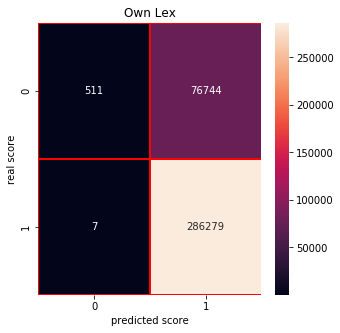

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(train['new_label'], train['lex_label'])
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Own Lex")
plt.xlabel("predicted score")
plt.ylabel("real score")
plt.yticks( va="center")
model_info(train['new_label'], train['lex_label'])

In [33]:
test['lex_score'] = test['clean_text2'].apply(lex_score)

In [34]:
test['lex_label'] = np.where(test['lex_score'] > 0,1,0)

### Test Data

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.789021,0.97931,0.788717,0.007352,0.999958,0.881864,0.014595,0.02069,0.211283


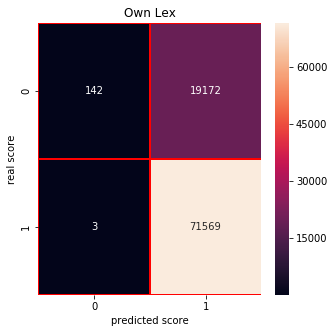

In [35]:
cm = confusion_matrix(test['new_label'], test['lex_label'])
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Own Lex")
plt.xlabel("predicted score")
plt.ylabel("real score")
plt.yticks( va="center")
model_info(test['new_label'], test['lex_label'])

In [36]:
len(test[test['lex_score'] == 0])

3

In [37]:
def scale_score(x):
    sc = round(((x - (-1))/ (1 - (-1))) * 100,3)
    return(sc)

In [38]:
test['scaled_score'] = test['lex_score'].apply(scale_score)
test.head()

,clean_text2,new_label,lex_score,lex_label,scaled_score
0,club one security guard must bad mood night sa...,0,0.410871,1,70.544
1,judge book cover say outside block look little...,1,0.510154,1,75.508
2,first cheesecake factory sparkling clean avoca...,0,0.412058,1,70.603
3,visited emily saturday evening church arrived ...,1,0.545134,1,77.257
4,click menu know girl register handle front end...,1,0.561642,1,78.082


In [39]:
print('Accommodation and Food Services:',round(test['scaled_score'].mean(),3) )

Accommodation and Food Services: 77.8


### Sampled Data

In [40]:
train['new_label'].value_counts()

1    286286
0     77255
Name: new_label, dtype: int64

In [41]:
df_0 = train[train['new_label'] == 0]
df_1 = train[train['new_label'] == 1]
df_under = df_1.sample(120000 ,random_state=19)
df_new = pd.concat([df_under, df_0], axis = 0)
############################
df_new = df_new.reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new["new_label"].value_counts()

1    120000
0     77255
Name: new_label, dtype: int64

In [42]:
train2 = df_new.copy()
train2 = train2[['clean_text2', 'new_label']]

In [43]:
print('Train Data')
print(len(train2))
ww = train2['new_label'].value_counts()
al2  = ww[1] + ww[0]
per02 =round(( ww[0]/al2) * 100,3)
per12= round((ww[1]/al2) * 100,3)
print('% 0:', per02)
print('% 1:', per12)

Train Data
197255
% 0: 39.165
% 1: 60.835


In [44]:
c_vect3 = CountVectorizer(max_features=4000, stop_words='english', min_df = 10,max_df = 0.85, ngram_range={1,3})
x_count3 = c_vect3.fit_transform(train2['clean_text2'])

In [45]:
print(len(c_vect3.get_feature_names()))

4000


In [46]:
arr3 = x_count3.toarray()
df_count3 = pd.DataFrame(arr3, columns= c_vect3.get_feature_names())

In [47]:
lb3 = train2[['new_label']]
df25 = pd.concat([df_count3, lb3], axis = 1)
df25.tail()

,able,absolute,absolutely,absolutely amazing,absolutely delicious,absolutely love,accept,acceptable,access,accommodate,...,young lady,younger,yuck,yum,yum yum,yummy,zero,zero star,zucchini,new_label
197250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df25['new_label'].value_counts()

1    120000
0     77255
Name: new_label, dtype: int64

In [49]:
pos = df25.loc[df25['new_label'] == 1]

In [50]:
neg = df25.loc[df25['new_label'] == 0]

In [51]:
test4 = pd.DataFrame([], columns = ['word', 'pos_score', 'neg_score','polarityScore'])
for i in range(4000):
    ww = df25.columns[i]
    pos1 = pos[ww].sum()
    neg1 = neg[ww].sum()
    w = pos1/(pos1 + neg1)
    w2 = neg1/(pos1 + neg1)
    pol = (2 * w) - 1
    test4 = test4.append({'word':ww,'pos_score':w,'neg_score':w2,'polarityScore':pol}, ignore_index = True)

In [52]:
print(len(test4))
test4.tail(9)

4000


,word,pos_score,neg_score,polarityScore
3991,young lady,0.327027,0.672973,-0.345946
3992,younger,0.453271,0.546729,-0.093458
3993,yuck,0.069579,0.930421,-0.860841
3994,yum,0.907773,0.092227,0.815547
3995,yum yum,0.904412,0.095588,0.808824
3996,yummy,0.908642,0.091358,0.817284
3997,zero,0.103960,0.896040,-0.792079
3998,zero star,0.005376,0.994624,-0.989247
3999,zucchini,0.622463,0.377537,0.244926


In [53]:
print('neg:', len(test4[test4['polarityScore'] < 0]))
print('pos:', len(test4[test4['polarityScore'] > 0]))

neg: 1414
pos: 2581


In [54]:
test5 = test4[(test4['pos_score'] <= 0.4) | (test3['pos_score'] > 0.60)]
print('neg:', len(test5[test5['polarityScore'] < 0]))
print('pos:', len(test5[test5['polarityScore'] > 0]))

neg: 1341
pos: 2213


In [55]:
test_lex3 = test5[['word', 'polarityScore']]
test_lex3.set_index('word', inplace = True)
test_lex3.head(2)

,polarityScore
word,
able,0.219223
absolute,0.242138


In [56]:
lex3 = test_lex3.to_dict()['polarityScore']
lex3

{'able': 0.21922266896419673,
 'absolute': 0.24213836477987427,
 'absolutely': 0.32533468047486735,
 'absolutely amazing': 0.9185840707964601,
 'absolutely delicious': 0.904296875,
 'absolutely love': 0.7847919655667146,
 'accept': -0.4182590233545648,
 'acceptable': -0.5621890547263682,
 'accommodating': 0.6208358570563295,
 'accompanied': 0.39956803455723544,
 'according': -0.15503875968992253,
 'account': -0.45867768595041325,
 'acknowledge': -0.7855946398659966,
 'acknowledged': -0.8181818181818181,
 'act': -0.4150360453141092,
 'acted': -0.8625678119349005,
 'actual': -0.1544827586206896,
 'actually': -0.06588807785888073,
 'add': 0.20657374661951322,
 'added': 0.2108843537414966,
 'adding': 0.11633986928104578,
 'addition': 0.4442105263157894,
 'additional': -0.2360248447204969,
 'address': -0.5,
 'adequate': -0.24444444444444446,
 'admit': 0.24788135593220328,
 'adult': 0.0546047269763652,
 'advance': -0.10659898477157359,
 'advantage': 0.23963963963963963,
 'advertised': -0.521

In [57]:
def lex_score2(y):
    splt = y.split()
    score = []
    for word in splt:
        if lex3.get(word) != None:
                val = lex3.get(word)
                score.append(val)
        else:
            pass
    gram_2 = [' '.join(x) for x in ngrams(y, 2)]   
    for word2 in gram_2:
        if lex3.get(word2) != None:
                val = lex3.get(word2)
                score.append(val)
        else:
            pass
    gram_3 = [' '.join(x) for x in ngrams(y, 3)]   
    for word3 in gram_3:
        if lex3.get(word3) != None:
                val = lex3.get(word3)
                score.append(val)
        else:
            pass
    if score == []:
        z = 0
        return(z)
    else:
        sc = np.mean(score)
        return(sc)

In [58]:
train2['lex_score'] = train2['clean_text2'].apply(lex_score2)

In [59]:
train2['lex_label'] = np.where(train2['lex_score'] > 0,1,0)

### Train Data test

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.855852,0.961612,0.817114,0.658223,0.983083,0.892448,0.781506,0.038388,0.182886


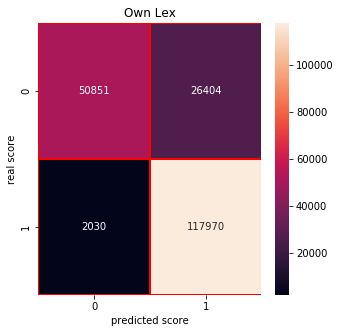

In [60]:
cm = confusion_matrix(train2['new_label'], train2['lex_label'])
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Own Lex")
plt.xlabel("predicted score")
plt.ylabel("real score")
plt.yticks( va="center")
model_info(train2['new_label'], train2['lex_label'])

In [75]:
test2 = test[['clean_text2', 'new_label']]
len(test2)

90886

In [76]:
test2['lex_score'] = test2['clean_text2'].apply(lex_score2)

In [77]:
test2['lex_label'] = np.where(test2['lex_score'] > 0,1,0)

### Test Data

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.914167,0.90992,0.914943,0.661593,0.982325,0.947438,0.766136,0.09008,0.085057


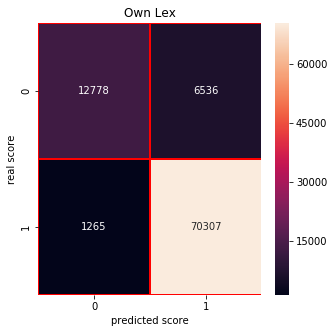

In [78]:
cm = confusion_matrix(test2['new_label'], test2['lex_label'])
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Own Lex")
plt.xlabel("predicted score")
plt.ylabel("real score")
plt.yticks( va="center")
model_info(test2['new_label'], test2['lex_label'])

In [79]:
len(test2[test2['lex_score'] == 0])

2

In [80]:
test2['scaled_score'] = test2['lex_score'].apply(scale_score)

In [81]:
print('Accommodation and Food Services:',round(test2['scaled_score'].mean(),3) )

Accommodation and Food Services: 58.753
